# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

from pandas import get_dummies

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [29]:
# Your code here
websites.head(10)

# What the dataset looks like?
#   There are a lot of information that at first sight does not seems to help to find anything
#   Despite that almost there are not nulls, actually there are some "None" values

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,162,US,31,22,3,3812,18784,8,0
6,B0_462,18,iso-8859-1,Apache/2,345,US,12,0,3,1189,8559,2,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,324,US,0,0,0,0,0,0,0
11,B0_1102,20,us-ascii,Microsoft-HTTPAPI/2.0,324,US,0,0,0,0,0,0,0
19,M0_69,22,us-ascii,Microsoft-HTTPAPI/2.0,324,US,9,0,4,850,1354,2,1
21,B0_2122,22,iso-8859-1,nginx,318,US,8,6,6,696,636,0,0
23,B0_569,22,utf-8,Apache/2.4.7 (Ubuntu),4421,AU,12,0,2,2259,5165,4,0
25,B0_884,22,ISO-8859-1,Apache,441,US,0,0,0,0,0,0,0
27,B0_916,22,utf-8,nginx,6671,CA,0,0,0,0,0,0,0
29,B0_1130,23,iso-8859-1,Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_b...,434,PA,0,0,0,0,0,0,0


In [ ]:
websites['URL'].convert_objects

In [4]:
# Your code here
websites.info()

# What are the data types?
#   There is a mix of types :object, int64 and float64
#   It seems there are not almost NaN but there are some "None" values
#   Our target is "Type" feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [5]:
# Type column should be the benign/malicius column since there are only two values, corelated with first character on URL column
websites.Type.unique()

array([1, 0])

In [6]:
# counting values 'None'
websites[websites == 'None'].count()

/usr/local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       175
CONTENT_LENGTH                 0
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
Type                           0
dtype: int64

In [7]:
# Which columns contain the features of the websites?
# URL                          Drop because there is column Type with ordinal information
# URL_LENGTH                   It could be useful
# NUMBER_SPECIAL_CHARACTERS    It could be useful 
# CHARSET                      It could be useful
# SERVER                       It could be useful
# CONTENT_LENGTH               It could be useful
# WHOIS_COUNTRY                1781 non-null object
# WHOIS_STATEPRO               1781 non-null object
# WHOIS_REGDATE                Drop since is the moment of register
# WHOIS_UPDATED_DATE           Drop since is the time of update
# TCP_CONVERSATION_EXCHANGE    It could be useful
# DIST_REMOTE_TCP_PORT         It could be useful
# REMOTE_IPS                   It could be useful
# APP_BYTES                    It could be useful
# SOURCE_APP_PACKETS           It could be useful
# REMOTE_APP_PACKETS           It could be useful
# SOURCE_APP_BYTES             It could be useful
# REMOTE_APP_BYTES             It could be useful
# APP_PACKETS                  It could be useful
# DNS_QUERY_TIMES              It could be useful
# Type                         It useful

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

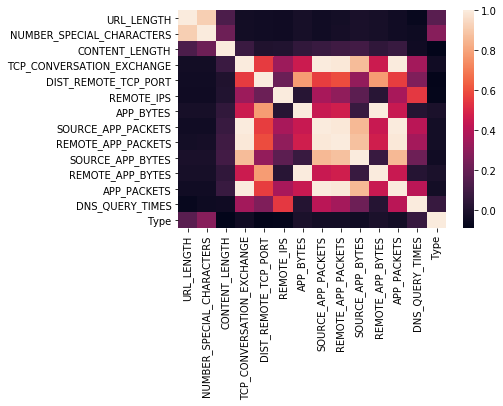

In [8]:
import seaborn as sns
# calculate the correlation matrix
corr = websites.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [9]:
# Your code here
# TCP_CONVERSATION_EXCHANGE feature has high collinearity with these other features:
# APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS

websites.drop(['NUMBER_SPECIAL_CHARACTERS','APP_PACKETS','REMOTE_APP_PACKETS','SOURCE_APP_PACKETS',
               'REMOTE_APP_BYTES'],axis=1,inplace=True)


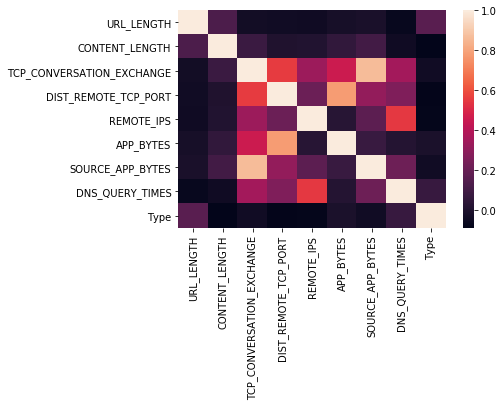

In [10]:
import seaborn as sns
# calculate the correlation matrix
corr = websites.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# There is any more important correlation

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [11]:
# We observe there are NaN in "CONTENT_LENGTH", "SERVER" AND "DNS_QUERY_TIMES"
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
DNS_QUERY_TIMES              1780 non-null float64
Type                         1781 non-null int64
dtypes: float64(2), int64(7), object(7)
memory usage: 222.7+ KB


In [12]:
#There are 812 NaN in "CONTENT_LENGTH", 1 NaN in "SERVER" AND 1 NaN in "DNS_QUERY_TIMES"
websites.isna().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [13]:
# Your code here
# As "CONTENT_LENGTH" is the feature with higher number of NaN (aprox. 50%), normally we should remove direclty but
# I guess this feature could be important, thus I rather eliminate the rows with NaN.

#websites.replace('None','NaN', inplace=True)
websites.dropna(axis=0, inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [14]:
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [15]:
# Your code here
print(websites['WHOIS_COUNTRY'].unique().tolist())

['None', 'US', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', "[u'GB'; u'UK']", 'UG', 'JP', 'SI', 'IL', 'AT', 'CN', 'BE', 'NO', 'TR', 'KY', 'BR', 'SC', 'NL', 'FR', 'CZ', 'KR', 'UA', 'CH', 'HK', 'United Kingdom', 'DE', 'IT', 'BS', 'SE', 'Cyprus', 'us', 'BY', 'AE', 'IE', 'PH', 'UY']


In [16]:
# Your code here
# I have found that there are 'None' values, so I have remplaced by NaN and them eliminate these rows
websites= websites.replace('None',np.nan)
websites.dropna(inplace=True )

# clean an extrange value
websites= websites[websites['WHOIS_COUNTRY'] == "Cyprus"] = 'CY'
# test it, or go to the notes
#it doesn't be  websites= websites[websites['WHOIS_COUNTRY'] == "Cyprus",'WHOIS_COUNTRY'] = 'CY'
#or  websites= websites[websites['WHOIS_COUNTRY'] == "Cyprus"]['WHOIS_COUNTRY'] = 'CY'
websites= websites[websites['WHOIS_COUNTRY'] == "us"] = 'US'
websites= websites[websites['WHOIS_COUNTRY'] == "se"] = 'SE'
websites= websites[websites['WHOIS_COUNTRY'] == "United Kingdom"] = 'UK'
websites= websites[websites['WHOIS_COUNTRY'] == "[u'GB'; u'UK']"] = 'GB'


countries_list= websites['WHOIS_COUNTRY'].unique().tolist()
print(countries_list)

['US', 'RU', 'AU', 'CA', 'PA', 'SE', 'GB', 'IN', 'UG', 'JP', 'UK', 'SI', 'AT', 'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT', 'BS', 'NO', 'CY', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [17]:
print(websites['WHOIS_COUNTRY'].value_counts())

US    513
CA     41
GB     15
AU     11
PA     10
JP      6
CH      5
IN      4
AT      4
CY      2
UY      2
BS      2
CN      2
SC      2
UK      2
UA      2
AE      1
NO      1
BY      1
NL      1
IE      1
IL      1
DE      1
SE      1
UG      1
TR      1
BE      1
PH      1
KY      1
IT      1
SI      1
HK      1
RU      1
Name: WHOIS_COUNTRY, dtype: int64


In [18]:
top_countries= websites['WHOIS_COUNTRY'].value_counts().head(10).index.tolist()

print(top_countries)

['US', 'CA', 'GB', 'AU', 'PA', 'JP', 'CH', 'IN', 'AT', 'CY']


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [19]:
# Your code here
for country in countries_list:
    if country not in top_countries:
        websites[websites['WHOIS_COUNTRY'] == country] = 'OTHER'

print(websites['WHOIS_COUNTRY'].value_counts())

US       513
CA        41
OTHER     29
GB        15
AU        11
PA        10
JP         6
CH         5
IN         4
AT         4
CY         2
Name: WHOIS_COUNTRY, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [20]:
# Your code here
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],axis=1,inplace=True)
websites.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES',
       'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [21]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 3 to 1780
Data columns (total 13 columns):
URL                          640 non-null object
URL_LENGTH                   640 non-null object
CHARSET                      640 non-null object
SERVER                       640 non-null object
CONTENT_LENGTH               640 non-null object
WHOIS_COUNTRY                640 non-null object
TCP_CONVERSATION_EXCHANGE    640 non-null object
DIST_REMOTE_TCP_PORT         640 non-null object
REMOTE_IPS                   640 non-null object
APP_BYTES                    640 non-null object
SOURCE_APP_BYTES             640 non-null object
DNS_QUERY_TIMES              640 non-null object
Type                         640 non-null object
dtypes: object(13)
memory usage: 70.0+ KB


In [22]:
websites.Type.unique()

array([0, 'OTHER', 1, 'GB', 'CY', 'US'], dtype=object)

In [25]:
websites = websites.drop(websites[websites.Type == 'OTHER'].index)
websites = websites.drop(websites[websites.Type == 'GB'].index)
websites = websites.drop(websites[websites.Type == 'US'].index)
websites = websites.drop(websites[websites.Type == 'CY'].index)
websites.Type.unique()

array([0, 1], dtype=object)

In [26]:
websites.Type = websites.Type.astype(int)

In [28]:
import pandas_profiling
pandas_profiling.ProfileReport(websites)

Number of variables,14
Number of observations,602
Total Missing (%),0.0%
Total size in memory,65.9 KiB
Average record size in memory,112.1 B
Numeric,9
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [ ]:
"""websites.drop(['URL','index'],inplace=True)
dummies or labelencoding = APP_BYTES(reducir a 11 categorias),CHARSET(a 6),SERVER(a 11),WHOIS_COUNTRY(a 6)


def categorical_reduction(df,feature,levels):
# Reduction of the different categorical values before doing some kind of encoding
# feature: the feature to be reduced
# levesls: number of unique categorical values to be keeped

    keeping_top= df[feature].value_counts().head(levels).index.tolist()
    categories= df[feature].unique().tolist()
    
    for categorie in categories:
        if categorie not in keeping_top:
            df[df[feature] == categorie] = 'OTHER'
            df[df[feature] == categorie, categorie] = 'OTHER'            
            df[df[feature]== categorie].apply(replace(categorie,'OTHER'))

print(websites['WHOIS_COUNTRY'].value_counts())

"""

In [27]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 3 to 1780
Data columns (total 13 columns):
URL                          602 non-null object
URL_LENGTH                   602 non-null object
CHARSET                      602 non-null object
SERVER                       602 non-null object
CONTENT_LENGTH               602 non-null object
WHOIS_COUNTRY                602 non-null object
TCP_CONVERSATION_EXCHANGE    602 non-null object
DIST_REMOTE_TCP_PORT         602 non-null object
REMOTE_IPS                   602 non-null object
APP_BYTES                    602 non-null object
SOURCE_APP_BYTES             602 non-null object
DNS_QUERY_TIMES              602 non-null object
Type                         602 non-null int64
dtypes: int64(1), object(12)
memory usage: 65.8+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [ ]:
# Your code here
print(websites['URL'].value_counts().head(10))
websites.drop(['URL'],axis=1,inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [ ]:
# Your code here
print(websites['CHARSET'].value_counts())

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [ ]:
# Your code here
print(websites['SERVER'].unique())

print(websites['SERVER'].value_counts())

![Think Hard](../think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [30]:
# Your code here
websites['SERVER'] = websites['SERVER'].apply(lambda x:\
    'Microsoft' if x.find("Microsoft") != -1 else \
    'Apache' if x.find("Apache") != -1 else \
    'nginx' if x.find("nginx") != -1 else 'Other')



In [32]:
websites['SERVER'].unique()
print(websites['SERVER'].value_counts())

Apache       287
Microsoft    120
Other        107
nginx         88
Name: SERVER, dtype: int64


In [31]:
websites['Type'].unique()
print(websites['Type'].value_counts())

0    563
1     39
Name: Type, dtype: int64


In [ ]:
# Count `SERVER` value counts here
print(websites['SERVER'].value_counts())


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [ ]:
websites.columns

In [ ]:
# Your code here
website_dummy = pd.get_dummies(websites, columns=['URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES'],drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [ ]:
# Your code here
website_dummy.head(10)

In [ ]:
website_dummy.columns

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [ ]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix, accuracy_score

# Your code here:
X = website_dummy.drop(['Type'], axis=1)
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

regressor = LinearRegression()

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [ ]:
# Your code here:



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [ ]:
# Your code here:



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
# Your code here:



What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [ ]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here